In [4]:
%%writefile 1.py
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

w_dimension=[2,1]
x_placehold=tf.placeholder(tf.float32,shape=[None,2])
y_placehold=tf.placeholder(tf.float32,shape=[None,1])
w = tf.Variable(tf.random_uniform(w_dimension, -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

def moon(r,w,n,d,show):
    inner_rad = r - w / 2
    rho = np.ones(n) * inner_rad + np.random.rand(n) * w
    theta = np.random.rand(n)*np.pi
    X=rho*np.array([np.cos(theta), np.sin(theta)])
    Y=np.ones(n)

    x = rho*np.array([np.cos(theta), -np.sin(theta)]) + (np.ones(X.shape).T*np.array([inner_rad,-d])).T
    y = -np.ones(n)

    if show:
        fig= pt.figure()
        ax = fig.gca()
        ax.set_aspect('equal')
        pt.scatter(X[0,:],X[1,:],marker='+')
        pt.scatter(x[0,:],x[1,:],marker='+')
        pt.show()
    
    return np.concatenate((X.T,x.T)), np.concatenate((Y.T,y.T))

def input():
    data, labels = moon(10, 6, 3000, 2, True)
    return data, labels



def inference():
    logits=tf.sign(tf.matmul(x_placehold,w)+b)
    return logits


def loss(logits):
    return tf.reduce_sum(tf.square(logits-y_placehold))


def train(loss,learning_rate):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train_op = optimizer.minimize(loss)
    return train_op


def evaluation(logits, labels):
    correct = tf.nn.in_top_k(logits,labels,1)
    return tf.reduce_sum(tf.cast(correct,tf.int32))

def feed_data(data):
    return feed_dict={x_placehold: data}

def feed_labels(labels):
    return  feed_dict={y_placehold: labels}

def feed_data_labels(data,labels):
    return feed_dict={x_placehold: data, y_placehold: labels}

def main():
#     data,labels=input()
#     logits=inference()
#     loss_step=loss(logits)
#     train_step = train(loss_step,0.001)
#     sess=tf.Session()
#     sess.run(tf.global_variables_initializer())
#     print(sess.run([w,b]))
#     labels.shape=(6000,1)
#     for i in range(1000):
#         sess.run(train_step,feed_dict={x_placehold:data,y_placehold:labels})
#     wc,bc=sess.run([w,b],feed_dict={x_placehold:data,y_placehold:labels})
#     print(wc,bc)
    
    labels.shape = (6000, 1)
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    sess.run(tf.sign(tf.matmul(x_placehold, w) + b),
             feed_dict={x_placehold: data})
    sess.run(tf.sign(tf.matmul(x_placehold, w) + b) - y_placehold,
             feed_dict={x_placehold: data, y_placehold: labels})
    sess.run(tf.square(tf.sign(tf.matmul(x_placehold, w) + b) -
                       y_placehold), feed_dict={x_placehold: data, y_placehold: labels})
    sess.run(tf.reduce_sum(tf.square(tf.sign(tf.matmul(x_placehold, w) + b) -
                                     y_placehold)), feed_dict={x_placehold: data, y_placehold: labels})

    logits = tf.matmul(x_placehold, w) + b
    loss_op = tf.reduce_sum(tf.square(logits - y_placehold))

    with tf.name_scope('loss'):
        tf.summary.scalar('error', loss_op)

    with tf.name_scope('w'):
        tf.summary.scalar('x', w[0, 0])
        tf.summary.scalar('y', w[1, 0])

    merged = tf.summary.merge_all()
    train_writer = tf.summary.FileWriter('./train', sess.graph)

    optimizer = tf.train.GradientDescentOptimizer(0.1)

    for i in range(1000):
        sess.run(optimizer.minimize(loss_op), feed_dict={
            x_placehold: data, y_placehold: labels})
        summary = sess.run(merged, feed_dict={
            x_placehold: data, y_placehold: labels})
        train_writer.add_summary(summary, i)

    wc, bc = sess.run([w, b], feed_dict={
                      x_placehold: data, y_placehold: labels})
    print(wc, bc)

if __name__ == '__main__':
    main()

Overwriting 1.py


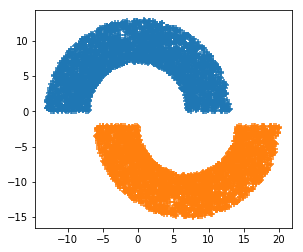

In [2]:
data,labels=input()

In [3]:
logits=inference()

In [4]:
loss_step=loss(logits)

In [5]:
train_step = train(loss_step,0.001)

In [6]:
sess=tf.Session()

In [7]:
sess.run(tf.global_variables_initializer())

In [8]:
print(sess.run([w,b]))

[array([[ 0.85874486],
       [ 0.58191085]], dtype=float32), array([ 0.], dtype=float32)]


In [9]:
labels.shape=(6000,1)
for i in range(1000):
    sess.run(train_step,feed_dict={x_placehold:data,y_placehold:labels})
# sess.run(train_step,feed_dict={x_placehold:data,y_placehold:labels})

In [10]:
wc,bc=sess.run([w,b],feed_dict={x_placehold:data,y_placehold:labels})

In [11]:
wc,bc


(array([[ 0.85874486],
        [ 0.58191085]], dtype=float32), array([ 0.], dtype=float32))

In [12]:
xc=np.arange(-15,15,0.1)

yc=-(wc[0]*xc+bc)/wc[1]

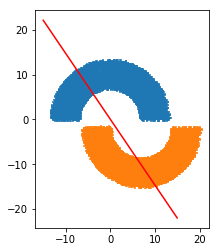

In [13]:
fig= pt.figure()
ax = fig.gca()
ax.set_aspect('equal')
pt.scatter(data[0:2999,0],data[0:2999,1],marker='+')
pt.scatter(data[3000:-1,0],data[3000:-1,1],marker='+')
pt.plot(xc,yc,'red')
pt.show()

In [14]:
sess.run(tf.sign(tf.matmul(x_placehold,w)+b),feed_dict={x_placehold:data})

array([[ 1.],
       [ 1.],
       [ 1.],
       ..., 
       [-1.],
       [-1.],
       [-1.]], dtype=float32)

In [15]:
sess.run(tf.sign(tf.matmul(x_placehold,w)+b) - y_placehold,feed_dict={x_placehold:data,y_placehold:labels})

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]], dtype=float32)

In [16]:
sess.run(tf.square(tf.sign(tf.matmul(x_placehold,w)+b) - y_placehold),feed_dict={x_placehold:data,y_placehold:labels})

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]], dtype=float32)

In [17]:
sess.run(tf.reduce_sum(tf.square(tf.sign(tf.matmul(x_placehold,w)+b) - y_placehold)),feed_dict={x_placehold:data,y_placehold:labels})

9476.0

In [18]:
optimizer = tf.train.GradientDescentOptimizer(0.001)

In [19]:
loss_op=tf.reduce_sum(tf.square(tf.sign(tf.matmul(x_placehold,w)+b) - y_placehold))

In [20]:
sess.run(optimizer.minimize(loss_op),feed_dict={x_placehold:data,y_placehold:labels})

In [21]:
sess.run([w,b],feed_dict={x_placehold:data,y_placehold:labels})

[array([[ 0.85874486],
        [ 0.58191085]], dtype=float32), array([ 0.], dtype=float32)]

In [22]:
for i in range(1000):
    sess.run(optimizer.minimize(loss_op),feed_dict={x_placehold:data,y_placehold:labels})

KeyboardInterrupt: 

In [ ]:
cw,cb = sess.run([w,b],feed_dict={x_placehold:data,y_placehold:labels})

In [ ]:
print(cw,cb)

In [25]:
w[0]

<tf.Tensor 'strided_slice:0' shape=(1,) dtype=float32>

In [26]:
w

In [27]:
w[0,0]

<tf.Tensor 'strided_slice_1:0' shape=() dtype=float32>